# Pycharm 에서 Jupyter Notebook을 이용한 AI 프로그램 입문
## 0. Pycharm 환경 설정
### 0.1. 한글 폰트 환경 설정 하기

#### 그래프 그리기에서 한글이 깨지는 예제


- 그래프를 그릴  때 캡션이나 레이블 등에 수치 이외의 문자열을 출력하는 경우가 있다.
Matkplotlib 에서 한글을 출력 처리할 때 글자가 깨지는 문제에 부딪힌다.
- 다음 예의 경우 한글이 깨지게 된다.

/Users/foxrose/PycharmProjects/PycharmJupyter/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 54620 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/foxrose/PycharmProjects/PycharmJupyter/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 44544 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/foxrose/PycharmProjects/PycharmJupyter/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/foxrose/PycharmProjects/PycharmJupyter/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/foxrose/PycharmProjects/PycharmJupyter/venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 51221 missing f

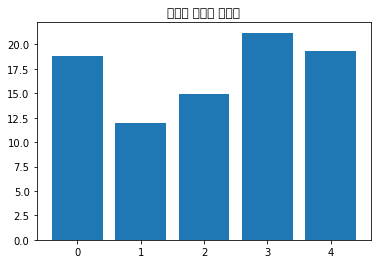

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0)

x = range(5)
y = 10 + 5 * np.random.randn(5)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("한글을 지정한 타이틀")

ax.bar(x, y)
plt.show()


### 한글법 폰트 이용하기 1: fontproperties 를 이용하는 방법

- pyplot.font_manager.FontProperties 클래스에 이용하고 싶은
폰트의 경로를 부여해서 인스턴트 폰트를 생성하고 폰트 사이즈를
설정한다.
- 한글을 사용하는 곳에서 fontproperties 에 생성한 FontProperties
의 인스턴트를 지정한다.

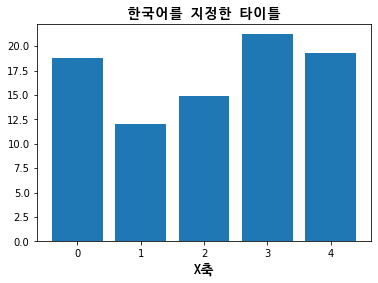

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt, font_manager

# 폰트 캐쉬를 재국축 한다.
font_manager._rebuild()

if os.name =='nt': 
    # OS가 Windows 인 경우 win32FontDirectory()를 이용할 수 있다.
    font_dir = font_manager.win32FontDirectory()
else:
    # OS가 Mac 인 경우에는 디렉터리를 지정한다.
    # 경로에 포함되는 유저명은 환경에 맞게 변경한다. ex) foxrose
    font_dir = '/Users/foxrose/Library/Fonts/'

# 개발용 폰로 D2Coding 폰트를 사용 하였습니다.
# D2Coding 폰트는 다음에서 다운로드 하여 설치 할 수 있습니다.
# https://github.com/naver/d2codingfont

font_path = os.path.join(font_dir, 'D2CodingBold.ttf')
font = font_manager.FontProperties(fname=font_path, size=14)

# 그래프를 작성한다. 
np.random.seed(0)

x = range(5)
y = 10 + 5 * np.random.randn(5)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title("한국어를 지정한 타이틀", fontproperties=font)
ax.set_xlabel('X축', fontproperties=font)
ax.bar(x, y)
plt.show()


### 한글법 폰트 이용하기 2: 파라미터[rcParams]를 이용하는 방법

- rcParams를 이용하여 font와 관련된 내용을 설정한다.

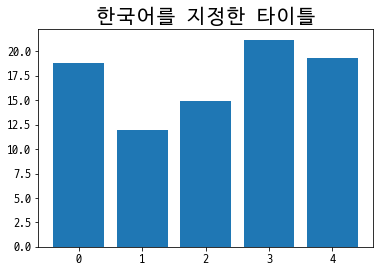

In [4]:
import numpy as np
from matplotlib import pyplot as plt, rcParams

rcParams['font.sans-serif'] = 'D2Coding'
rcParams['font.weight'] =  'regular'
rcParams['axes.titlesize'] = 20
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12

np.random.seed(0)

x = range(5)
y = 10 + 5 * np.random.randn(5)
fig = plt.figure()
ax = fig.add_subplot(111)

#여기에 폰트 정보를 저장할 필요가 없다. 
ax.set_title( '한국어를 지정한 타이틀')
ax.bar(x, y)

plt.show()

### 한글법 폰트 이용하기 3: 설정 파일[mapplotlibrc]로 지정하기

- Python의 코드로 폰트를 지정하는 것이 아니라 Maplotlib의 설정파일
matplotlibrc을 편집해서 폰트를 설정하는 방법을 알아본다.
- matplotlibrc은 Matplotlib의 설정파일이다. 폰트 설정 이외에 그래프
작성에 관한 설정도 가능하다. 설정된 값은 초기 설정값으로 채용되기
때문에 Notebook마다 설정할 필요가 없어졌다.

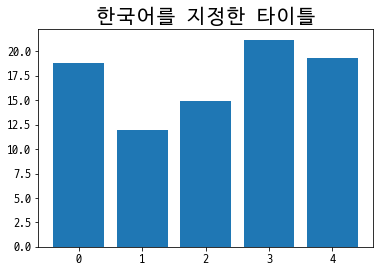

In [5]:
import numpy as np
from matplotlib import pyplot as plt

# 그래프를 작성한다.
np.random.seed(0)

x = range(5)

y = 10 + 5 * np.random.randn(5)
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('한국어를 지정한 타이틀')
ax.bar(x, y)

plt.show()